In [1]:
import sys
from itertools import combinations
from math import sin
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.colors import ListedColormap
from tqdm import tqdm

sys.path.append("../code/")

import xgi
from hypersync_draw import *
from hypersync_generate import *
from hypersync_identify import *
from hypersync_integrate import *

sb.set_theme(
    style="ticks",
    context="paper",
    #rc={"text.usetex": True, "font.family": "serif", "font.serif": "mathpazo"},
)

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

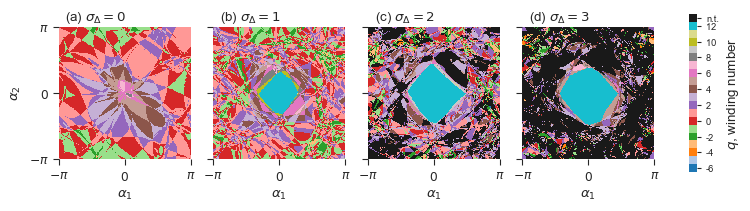

In [2]:

sigmas = [0, 1, 2, 3]
basins = [None] * len(sigmas)

fig, axs = plt.subplots(1, len(sigmas), sharex=True, sharey=True, figsize=(7.4, 2), layout="constrained")

#colors = sb.color_palette("coolwarm", n_colors=26)[6:]
colors = sb.color_palette("tab20")
colors[-1] = "k" 
cmap = ListedColormap(colors)

for i, sigma in enumerate(sigmas):
    
    basins[i] = np.loadtxt(f"../data/q=12_sigma={sigma}.txt", delimiter=",")
    flag = 0
    if 99 in basins[i]:
        flag = 1
        no_sync = np.unique(basins[i])[-2] + 1
        basins[i][basins[i] == 99] = no_sync

    im = axs[i].imshow(
        basins[i],
        cmap=cmap,
        aspect="equal",
        vmin=-6-0.5,
        vmax=13+0.5,
        #alpha=0.9,
        origin="lower",
        interpolation="none",
        extent=[-np.pi, np.pi, -np.pi, np.pi],
    )

    axs[i].set_xlabel(r'$\alpha_1$')
    axs[i].set_xticks([-np.pi,0,np.pi])
    axs[i].set_yticks([-np.pi,0,np.pi])
    axs[i].set_xticklabels([r'$-\pi$', '$0$', r'$\pi$'])
    
    letter = ["a", "b", "c", "d"]
    
    axs[i].text(0.05, 1.05, f"({letter[i]}) $\sigma_{{\Delta}} = {sigma}$", transform=axs[i].transAxes)

#axs[0].text(0.95, 1.05, f"a", transform=axs[0].transAxes, weight="bold", va="bottom", ha="right")
#axs[1].text(0.95, 1.05, f"b", transform=axs[1].transAxes, weight="bold", va="bottom", ha="right")
#axs[2].text(0.95, 1.05, f"c", transform=axs[2].transAxes, weight="bold", va="bottom", ha="right")
#axs[3].text(0.95, 1.05, f"d", transform=axs[3].transAxes, weight="bold", va="bottom", ha="right")

axs[0].set_yticklabels([r'$-\pi$', '$0$', r'$\pi$'])
    
axs[0].set_ylabel(r'$\alpha_2$')

ticks = list(range(-6, 13, 2)) + [13]
cbar = fig.colorbar(im, ax=axs, ticks=ticks, shrink=1.2, label="$q$, winding number")

for ax in axs:
    ax.tick_params('both', width=0.8, length=4, which='major')

cbar.ax.tick_params('both', width=0.8, length=3, which='major')

custom_tick_labels = [str(i) if i != 13 else 'n.t.' for i in ticks]
cbar.set_ticklabels(custom_tick_labels)


sb.despine(bottom=True, left=True)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize="x-small")

plt.savefig(f"{results_dir}figure_3.pdf", dpi=250)#, bbox_inches="tight", pad_inches=0)


In [16]:
sb.color_palette("tab20", desat=0.79)

[(0.18292156862745101, 0.455549019607843, 0.6445294117647059),
 (0.7062352941176471, 0.783686274509804, 0.8859215686274511),
 (0.9007647058823529, 0.5042156862745097, 0.15413725490196084),
 (0.9444117647058824, 0.7337450980392157, 0.5261764705882354),
 (0.22031372549019612, 0.5796862745098039, 0.22031372549019612),
 (0.619549019607843, 0.8395098039215686, 0.5761764705882352),
 (0.7671568627450981, 0.22499999999999998, 0.22809803921568617),
 (0.956764705882353, 0.6376666666666667, 0.6314705882352942),
 (0.5787450980392155, 0.43933333333333335, 0.7057647058823528),
 (0.7704901960784313, 0.7054313725490196, 0.8200588235294117),
 (0.5222549019607844, 0.3549607843137256, 0.3208823529411765),
 (0.7488627450980393, 0.6249411764705882, 0.600156862745098),
 (0.8457254901960785, 0.5111372549019608, 0.743490196078431),
 (0.9418627450980391, 0.7404901960784315, 0.8272352941176468),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.6742549019607844, 0.6773529411764706, 0.19715686274509803),
 (0.826705882352941, 0.826705882352941, 0.5850588235294119),
 (0.1659607843137254, 0.6833333333333332, 0.7360000000000001),
 (0.648843137254902, 0.8347254901960783, 0.8688039215686274)]